# **El desacuerdo: la definición de probabilidad**

Para los frecuentistas, las probabilidades están fundamentalmente relacionadas con la frecuencia de los eventos.

Para los bayesianos, las probabilidades están fundamentalmente relacionadas con su propio conocimiento sobre un evento.

**Un ejemplo sencillo: Mediciones de flujo de fotones**

Imaginemos que apuntamos un telescopio al cielo y observamos la luz proveniente de una sola estrella. Para simplificar, supondremos que el verdadero flujo de fotones de la estrella es constante con el tiempo, es decir, tiene un valor fijo $F$; También ignoraremos efectos como los errores sistemáticos del fondo del cielo.

Supondremos que se realizan una serie de mediciones de $N$, donde la i-ésima medición informa del flujo $F_i$ observado y el error $e_i$. La pregunta es, dado este conjunto de mediciones $D=\{F_i , e_i\}$, ¿cuál es nuestra mejor estimación del verdadero flujo $F$?

In [ ]:
# Extraeremos 50 muestras F_i con una media de 1000 (en unidades arbitrarias) y un error (conocido) e_i
import numpy as np

np.random.seed(2)
e = np.random.normal(30, 3, 50)
F = np.random.normal(1000, e)

*Enfoque frecuentista para la medición de flujo*

Dada una sola observación $Di=(F_i , e_i)$, podemos calcular la distribución de probabilidad de la medición dado el flujo verdadero F dada nuestra suposición de errores gaussianos

$$
P(D_i|F)=(2πe_i^2)^{-\frac{1}{2}}e^{\frac{-(F_i-F)^2}{2e_i^2}}
$$

Construimos la probabilidad calculando el producto de las probabilidades para cada punto de datos:

$$
ℒ(D|F)=\prod_{i=1}^N P(D_i|F)
$$

Aquí $D={D_i}$ representa todo el conjunto de mediciones. La combinación de las dos ecuaciones anteriores da:

$$
\log{[ℒ(D|F)]}=-\frac{1}{2}\prod_{i=1}^N \left[\log{(2πe_i^2)}+{\frac{(F_i-F)^2}{e_i^2}}\right]
$$

Nos gustaría determinar el valor de F que maximiza la probabilidad. El resultado es una media ponderada simple de los valores observados.

$$
\hat{F}=\frac{\sum w_iF_i}{\sum w_i};\hspace{1cm} w_i=\frac{1}{e_i^2}
$$

Podemos ir más allá y preguntarnos cuál es la incertidumbre de nuestra estimación. Una forma en que esto se puede lograr en el enfoque frecuentista es construir una aproximación gaussiana a la probabilidad máxima.

$$
σ_{\hat{F}}=\left(\sum_{i=1}^N w_i\right)^{-\frac{1}{2}}
$$



In [ ]:
w = 1. / e ** 2
F_hat = np.sum(w * F) / np.sum(w)
sigma_F = w.sum() ** -0.5
print("F estimado = ", F_hat, "+/-", sigma_F)

F estimado =  998.6496963757094 +/- 4.113743971231106


*Enfoque bayesiano para la medición de flujo*

Para calcular este resultado, a continuación aplicamos el teorema de Bayes.

$$
P(F|D)=\frac{P(D|F)P(F)}{P(D)}
$$

Haciendo $P(F)$ equivalente a 1, tenemos que P(F|D) es equivalente a ℒ(D|F). Por lo tanto, el punto de vista frecuentista y bayesiano son equivalentes para este problema.

# **Donde los resultados divergen**

Si bien es fácil demostrar que los dos enfoques son a menudo equivalentes para problemas simples, también es cierto que pueden divergir mucho en otras situaciones. En la práctica, esta divergencia suele ser más clara de dos maneras diferentes:


*   El manejo de parámetros molestos: es decir, parámetros que afectan al resultado final, pero que no son de interés.
*   El diferente manejo de la incertidumbre: por ejemplo, la sutil (y a menudo pasada por alto) diferencia entre los intervalos de confianza frecuentistas y las regiones bayesianas creíbles.

*Parámetros molestos: Juego de billar de Bayes*

Un parámetro de molestia es cualquier cantidad cuyo valor no es directamente relevante para el objetivo de un análisis, pero que, sin embargo, es necesario para determinar el resultado que es de interés.

Consideramos como ejemplo un juego de azar en el que Alice y Bob apuestan por el resultado de un proceso que no pueden observar directamente.

Alice y Bob entran en una habitación. Detrás de una cortina hay una mesa de billar, que no pueden ver. Su amiga Carol hace rodar una pelota por la mesa y marca dónde cae. Una vez que esta marca está en su lugar, Carol comienza a rodar nuevas bolas por la mesa. Si la pelota cae a la izquierda de la marca, Alice obtiene un punto; si cae a la derecha de la marca, Bob obtiene un punto. Podemos suponer que las tiradas de Carol son imparciales: es decir, las bolas tienen las mismas posibilidades de acabar en cualquier lugar de la mesa. La primera persona en llegar a seis puntos gana el juego.

En este caso, la ubicación de la marca (determinada por la primera tirada) puede considerarse un parámetro molesto: es desconocida y no tiene un interés inmediato, pero claramente debe tenerse en cuenta a la hora de predecir el resultado de las tiradas posteriores.

Dada esta configuración, buscamos responder a esta pregunta: En un juego en particular, después de ocho tiradas, Alice tiene cinco puntos y Bob tiene tres puntos. ¿Cuál es la probabilidad de que Bob consiga seis puntos y gane el partido?

Consideraremos las siguientes cantidades:

* B = Bob gana
* D = datos observados, es decir, $D=(nA,nB)=(5,3)$
* p = probabilidad desconocida de que una pelota caiga en el lado de Alice durante el juego actual

Queremos calcular $P(B|D)$; es decir, la probabilidad de que Bob gane dada la observación de que Alice tiene actualmente cinco puntos frente a los tres de Bob.

$$
P(B|D)=∫_{-∞}^∞ P(B,p|D)dp
$$

Esta identidad se deriva de la definición de probabilidad condicional y de la ley de la probabilidad total.

Para calcular este resultado, manipularemos la expresión anterior para $P(B|D)$ hasta que podamos expresarlo en términos de otras cantidades que podamos calcular.

$$
P(B|D)=∫P(B|p,D)P(p|D)dp=∫P(B|p,D)\frac{P(D|p)P(p)}{P(D)}dp=\frac{∫P(B|p,D)P(D|p)P(p)}{∫P(D|p)P(p)dp}
$$

* $P(B|p,D)$: Dada la ubicación de un marcador p y las 5 victorias de Alice frente a las 3 de Bob, ¿cuál es la probabilidad de que Bob llegue a seis victorias? Bob necesita tres victorias seguidas, es decir, $P(B|p,D)=(1-p)^3$.
* $P(D|p)$: Dada una probabilidad $p$, ¿cuál es la probabilidad de obtener exactamente 5 resultados positivos de ocho ensayos? La respuesta viene de la distribución binomial: $P(D|p)∝p^5(1-p)^3$
* $P(p)$: $P(p)∝1$ por $0≤p≤1$

Simplificando:

$$
P(B|D)=\frac{∫_0^1 (1-p)^6p^5dp}{∫_0^1 (1-p)^3p^5dp}
$$

In [ ]:
from scipy.special import beta
P_B_D = beta(6+1, 5+1) / beta(3+1, 5+1)
print("P(B|D) = ", P_B_D)

P(B|D) =  0.09090909090909091


Para un problema como este (es decir, con un a priori bien motivado), el bayesianismo proporciona un marco más natural para manejar parámetros molestos: mediante la simple manipulación algebraica de unos pocos axiomas de probabilidad bien conocidos interpretados en un sentido bayesiano, llegamos directamente a la respuesta correcta sin necesidad de otros conocimientos estadísticos especiales.

# **Confianza vs. credibilidad: el exponencial truncado de Jaynes**

Una segunda consecuencia importante de la diferencia filosófica entre el frecuentismo y el bayesianismo está en el manejo de la incertidumbre, ejemplificada por las herramientas estándar de cada método: intervalos de confianza (IC) frecuentistas y regiones de credibilidad bayesianas (CR). Por ejemplo, al construir un límite estándar del $95\%$ alrededor de un parámetro $θ$:

* Un bayesiano diría: "Dados nuestros datos observados, hay un $95\%$ de probabilidad de que el verdadero valor de $θ$ se encuentre dentro de la región creíble".
* Un frecuentista diría: "Si este experimento se repite muchas veces, en el $95\%$ de estos casos el intervalo de confianza calculado contendrá el $θ$ verdadero".

Nótese la sutil diferencia: el bayesiano hace una declaración de probabilidad sobre el valor del parámetro dada una región creíble fija. El frecuentista hace una afirmación de probabilidad sobre el propio intervalo de confianza dado un valor de parámetro fijo.

Consideremos un dispositivo que funcionará sin fallas durante un tiempo $θ$ debido a un inhibidor químico protector inyectado en él; Pero en el momento $θ$ el suministro del producto químico se agota, y entonces comienzan las fallas, siguiendo la ley de la falla exponencial. No es factible observar directamente el agotamiento de este inhibidor; Sólo se pueden observar los fallos resultantes. A partir de los datos sobre los tiempos de fallo reales, estime el tiempo $θ$ de funcionamiento seguro garantizado.

Tenemos los datos D extraídos del modelo:

$$
P(x|ϴ)=e^{ϴ-x},\hspace{1cm}x>0
$$

Donde $p(x|θ)$ da la probabilidad de fallo en el tiempo $x$, dado un inhibidor que dura un tiempo $θ$. Observamos algunos tiempos de fallo, digamos $D=\{10,12,15\}$, y pedimos límites de incertidumbre del $95%$ en el valor de $θ$.

Dado el modelo, un evento solo puede suceder después de un tiempo $θ$. Darle la vuelta a esto nos dice que el límite superior de $θ$ debe ser $min(D)$. Entonces, para nuestros datos particulares, escribiríamos inmediatamente $θ≤10$.

*Exponencial truncado: un enfoque frecuentista*

En el paradigma frecuentista, nos gustaría calcular un intervalo de confianza sobre el valor de $θ$. Podríamos empezar por observar que la media poblacional viene dada por:

$$
E[x]=∫_0^∞ xp(x)dx=ϴ+1
$$

Usando la media de la muestra como la estimación puntual de $E(x)$, tenemos un estimador insesgado para $θ$ dado por

$$
\hat{ϴ}=\frac{1}{N}\sum_{i=1}^N x_i-1
$$

En el límite de $N$ grande, el teorema del límite central nos dice que la distribución del muestreo es normal con una desviación estándar dada por el error estándar de la media: $σ_{\hat{ϴ}}^2=1/N$, y podemos escribir el intervalo de confianza del $95%$ como

$$
CI=(\hat{ϴ}-2N^{-\frac{1}{2}},\hat{ϴ}+2N^{-\frac{1}{2}})
$$

Esto da un intervalo de confianza alrededor de nuestro estimador insesgado de $CI(θ)=(10.2,12.5)$, completamente por encima de nuestro límite de sentido común de $θ<10$.

*Exponencial truncado: un enfoque bayesiano*

Un enfoque bayesiano del problema comienza con la regla de Bayes:

$$
P(ϴ|D)=\frac{P(D|ϴ)P(ϴ)}{P(D)}
$$

Usamos la probabilidad dada por

$$
P(D|ϴ)∝∏_{i=1}^N P(x_i|ϴ)
$$

Para nuestros datos particulares, la región bayesiana creíble es $CR(ϴ)=(9,10)$.

Esto demuestra que cuando se utilizan métodos frecuentistas en datos fijos, debemos tener muy en cuenta a qué pregunta responde el frecuentismo. El frecuentismo no busca un enunciado probabilístico sobre un intervalo fijo como lo hace el enfoque bayesiano; En su lugar, busca enunciados probabilísticos sobre un conjunto de intervalos construidos, con el intervalo calculado particular a un solo dibujo de entre ellos. A pesar de esto, es común ver un intervalo de confianza del 95% interpretado en el sentido bayesiano: como un intervalo fijo en el que se espera encontrar el parámetro el 95% de las veces. Como se ve claramente aquí, esta interpretación es defectuosa y debe evitarse cuidadosamente.

# **Bayesianismo en la práctica: Cadena de Markov Monte Carlo**

MCMC es una clase de algoritmos que pueden caracterizar eficientemente incluso distribuciones posteriores de alta dimensión mediante el dibujo de muestras aleatorias de modo que los puntos se distribuyan de acuerdo con la parte posterior.

**Aplicación: Un modelo lineal simple**

Consideremos un modelo lineal simple de tres parámetros que se ajusta en línea recta a datos con errores desconocidos. Los parámetros serán la intersección con el eje y $α$, la pendiente $β$ y la dispersión normal (desconocida) $σ$ alrededor de la línea.

Para los datos $D={x_i , y_i}$, el modelo es

$$
\hat{y}(x_i|α,β)=α+βx_i
$$

y la probabilidad es el producto de la distribución gaussiana para cada punto.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fijar la semilla para la repetibilidad
np.random.seed(42)

# Definir los parámetros verdaderos y generar los datos
theta_true = (25, 0.5)  # Intercepto y pendiente verdaderos
xdata = 100 * np.random.random(20)  # Datos aleatorios para x entre 0 y 100
ydata = theta_true[0] + theta_true[1] * xdata  # Generar valores y sin ruido
ydata = np.random.normal(ydata, 10)  # Añadir ruido Gaussiano a y

A continuación consideraremos una solución frecuentista a este problema calculada con el paquete statsmodels, así como una solución bayesiana calculada con varias implementaciones de MCMC en Python: emcee, PyMC y PyStan.

Se puede encontrar una solución frecuentista calculando la estimación del punto de máxima verosimilitud.

In [ ]:
# Crear la matriz de diseño X con una columna de 1's (para el intercepto) y otra con xdata
X = np.vstack([np.ones_like(xdata), xdata]).T

# Resolver la estimación de los parámetros usando mínimos cuadrados
theta_hat = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, ydata))

# Calcular los valores y estimados usando los parámetros ajustados
y_hat = np.dot(X, theta_hat)

# Estimar la desviación estándar de los residuos
sigma_hat = np.std(ydata - y_hat)

# Calcular la matriz de covarianza de los parámetros estimados
Sigma = sigma_hat ** 2 * np.linalg.inv(np.dot(X.T, X))

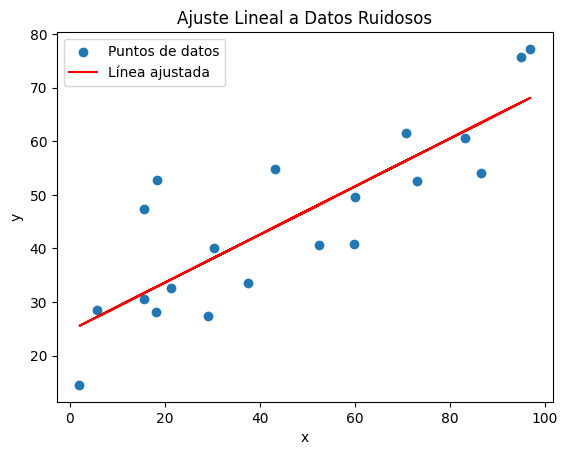

In [ ]:
# Graficar los puntos de datos y la línea ajustada
plt.scatter(xdata, ydata, label='Puntos de datos')  # Puntos de datos con ruido
plt.plot(xdata, y_hat, color='red', label='Línea ajustada')  # Línea ajustada
plt.xlabel('x')  # Etiqueta del eje x
plt.ylabel('y')  # Etiqueta del eje y
plt.title('Ajuste Lineal a Datos Ruidosos')  # Título de la gráfica
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar gráfica

En la práctica, el enfoque frecuentista a menudo se basa en muchos diagnósticos más estadísticos más allá del intervalo de máxima verosimilitud y confianza. Estos se pueden calcular rápidamente utilizando rutinas de conveniencia integradas en el paquete statsmodels. Para este problema, se puede utilizar de la siguiente manera:

In [ ]:
import statsmodels.api as sm # version 0.5
X = sm.add_constant(xdata)
result = sm.OLS(ydata, X).fit()
sigma_hat = result.params
Sigma = result.cov_params()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.683   
Dependent Variable: y                AIC:                147.7737
Date:               2024-10-09 00:00 BIC:                149.7651
No. Observations:   20               Log-Likelihood:     -71.887 
Df Model:           1                F-statistic:        41.97   
Df Residuals:       18               Prob (F-statistic): 4.30e-06
R-squared:          0.700            Scale:              86.157  
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      24.6361     3.7871   6.5053   0.0000   16.6797   32.5924
x1          0.4483     0.0692   6.4782   0.0000    0.3029    0.5937
-----------------------------------------------------------------
Omnibus:              1.996        Durbin-Watson:           2.758
Prob(Omnibus):   

*Solución bayesiana*

El paquete emcee es un paquete ligero de Python puro que implementa Affine Invariant Ensemble MCMC, una versión sofisticada del muestreo de MCMC. Para usar emcee, todo lo que se requiere es definir una función de Python que represente el logaritmo de la posterior. Para mayor claridad, factorizaremos esta definición en dos funciones, el log-prior y el log-verosimilitud:

In [ ]:
pip install emcee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.6 MB/s eta 0:00:00


In [ ]:
import emcee

# Definimos la función del prior (información previa sobre los parámetros)
def log_prior(theta):
    alpha, beta, sigma = theta
    if sigma < 0:  # Si sigma es negativo, retornamos log(0) (-∞)
        return -np.inf
    else:
        # Prior basado en la distribución del parámetro beta y sigma
        return (-1.5 * np.log(1 + beta**2) - np.log(sigma))

# Definimos la función de verosimilitud (logaritmo de la likelihood)
def log_like(theta, x, y):
    alpha, beta, sigma = theta
    y_model = alpha + beta * x  # Modelo lineal: y = alpha + beta * x
    # Retornamos el logaritmo de la likelihood (verosimilitud)
    return -0.5 * np.sum(np.log(2*np.pi*sigma**2) + (y-y_model)**2 / sigma**2)

# Definimos la función del posterior (prior + likelihood)
def log_posterior(theta, x, y):
    return log_prior(theta) + log_like(theta, x, y)

A continuación, configuramos el cálculo. El maestro de ceremonias combina múltiples "caminantes" que interactúan, cada uno de los cuales da como resultado su propia cadena de Markov. También especificaremos un período de quemado, para permitir que las cadenas se estabilicen antes de dibujar nuestras trazas finales:

In [ ]:
ndim = 3  # número de parámetros en el modelo (alpha, beta, sigma)
nwalkers = 50  # número de "caminantes" MCMC (cantidad de cadenas paralelas)
nburn = 1000  # número de pasos de calentamiento o burn-in
nsteps = 2000  # número de pasos del MCMC
starting_guesses = np.random.rand(nwalkers, ndim)  # posiciones iniciales aleatorias

In [ ]:
# Ejecutamos el sampler MCMC con el conjunto de datos
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[xdata, ydata])
sampler.run_mcmc(starting_guesses, nsteps)

# La cadena resultante tiene la forma (nwalkers, nsteps, ndim)
# Eliminamos los puntos de calentamiento (burn-in) y reorganizamos los datos
trace = sampler.chain[:, nburn:, :]  # eliminamos los primeros 'nburn' pasos
trace = trace.reshape(-1, ndim).T  # reorganizamos la cadena

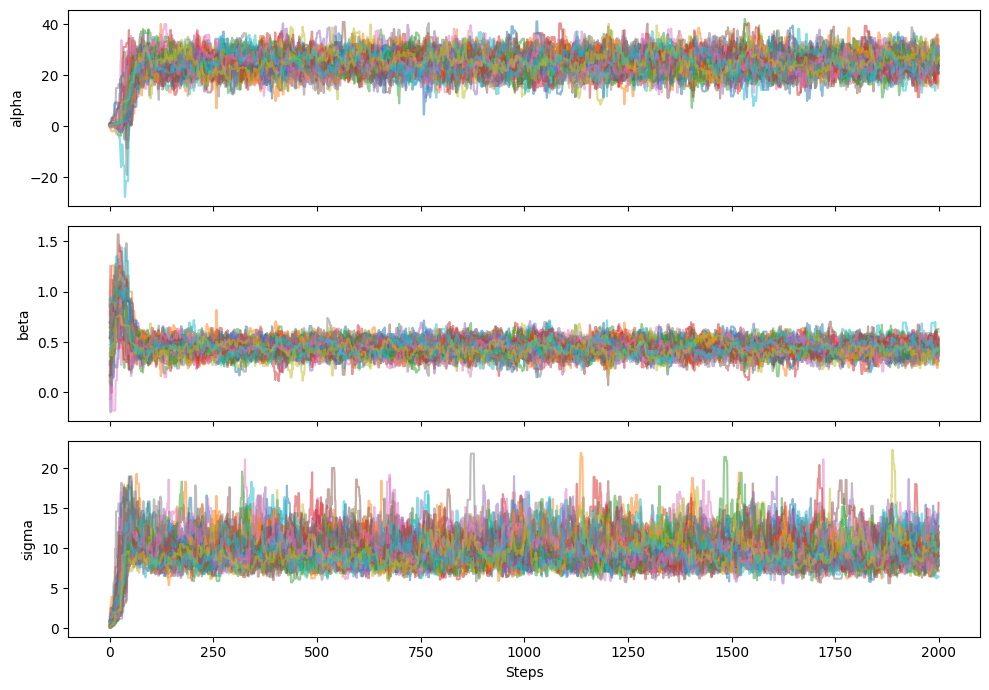

In [ ]:
# Graficamos el seguimiento de cada parámetro (alpha, beta, sigma) después del burn-in
fig, axs = plt.subplots(ndim, figsize=(10, 7), sharex=True)

# Etiquetas de los parámetros
param_labels = ['alpha', 'beta', 'sigma']

# Trazamos el historial de cada parámetro para cada caminante (walker)
for i in range(ndim):
    for walker in range(nwalkers):
        axs[i].plot(sampler.chain[walker, :, i], alpha=0.5)
    axs[i].set_ylabel(param_labels[i])

# Añadimos etiquetas finales
axs[-1].set_xlabel("Steps")
plt.tight_layout()
plt.show()

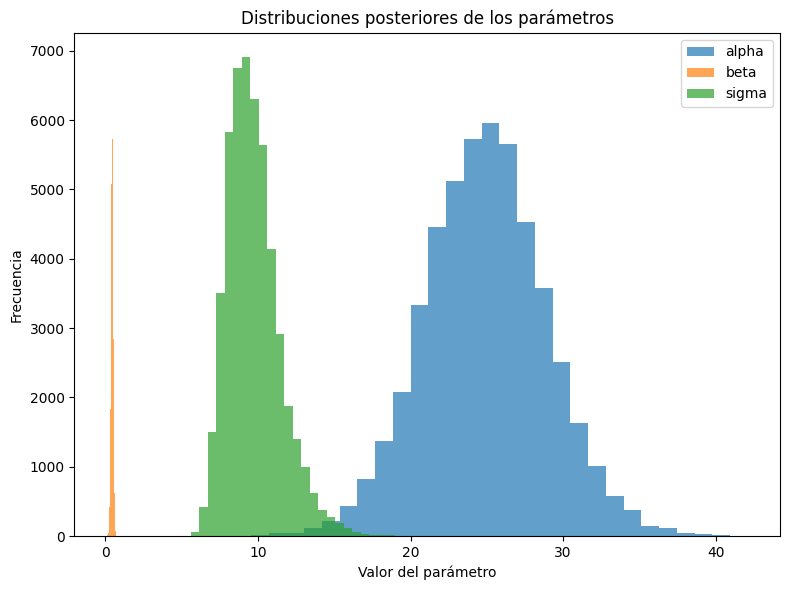

In [ ]:
# Graficamos las distribuciones posteriores de los parámetros
fig = plt.figure(figsize=(8, 6))

# Histogramas de los parámetros obtenidos
for i in range(ndim):
    plt.hist(trace[i], bins=30, alpha=0.7, label=param_labels[i])

plt.legend()
plt.xlabel("Valor del parámetro")
plt.ylabel("Frecuencia")
plt.title("Distribuciones posteriores de los parámetros")
plt.tight_layout()
plt.show()

*Solución con PyMC*

El paquete PyMC es una implementación de MCMC escrita en Python y Fortran. Hace uso del clásico muestreador MCMC de Metropolis-Hastings, e incluye muchas características integradas, como el soporte para el muestreo eficiente de distribuciones previas comunes.

Para usar PyMC, primero definimos todas las variables usando sus clases y decoradores:

In [ ]:
import pymc as pm

# Datos de ejemplo
xdata = np.linspace(-10, 10, 100)  # Valores de x
ydata = np.random.normal(0, 1, 100)  # Valores de y simulados

with pm.Model() as model:
    # Priorización para los parámetros desconocidos del modelo
    alpha = pm.Normal('alpha', mu=0, sigma=10)  # Prior para alpha
    beta = pm.Normal('beta', mu=0, sigma=10)    # Prior para beta
    sigma = pm.HalfNormal('sigma', sigma=1)     # Prior para sigma (siempre positivo)

    # Modelo lineal
    y_model = alpha + beta * xdata

    # Verosimilitud (distribución de muestreo) de las observaciones
    y_obs = pm.Normal('y_obs', mu=y_model, sigma=sigma, observed=ydata)

    # Muestreo MCMC
    trace = pm.sample(100000, tune=50000, return_inferencedata=False)

Output()

Output()

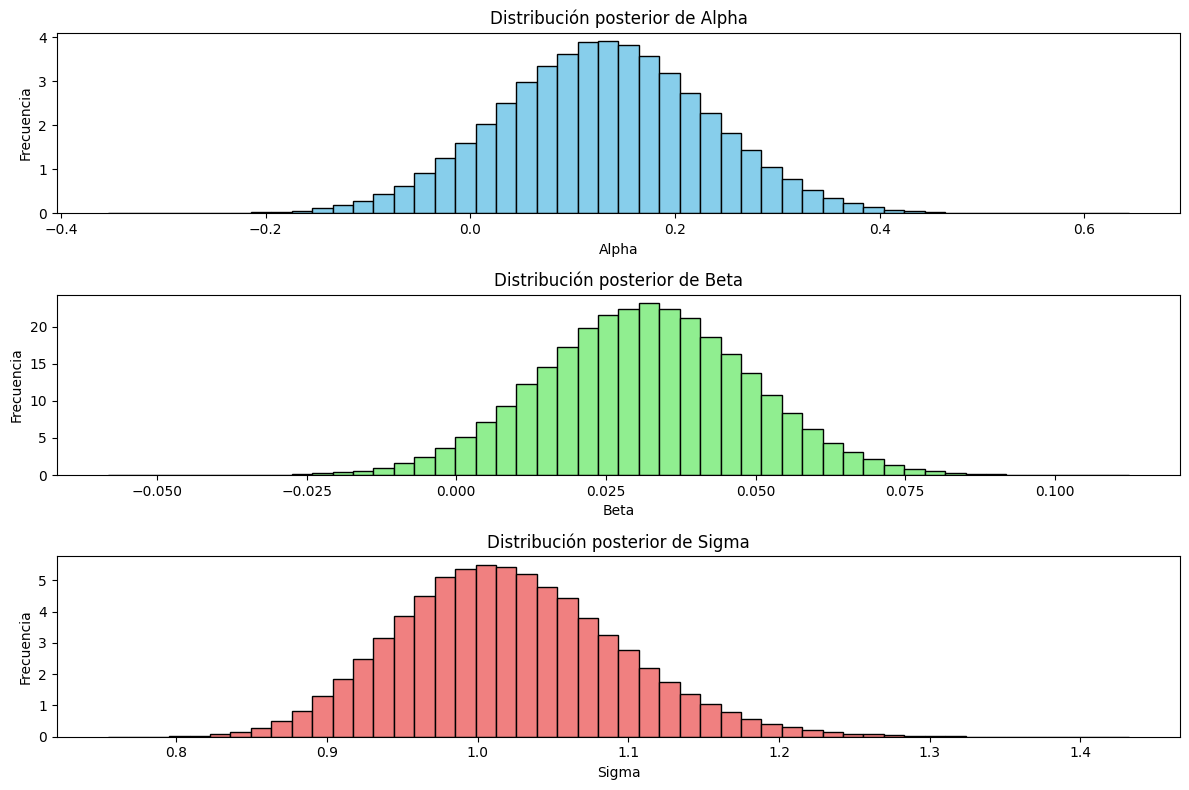

In [ ]:
# Extraer las trazas de cada parámetro
alpha_trace = trace['alpha']
beta_trace = trace['beta']
sigma_trace = trace['sigma']

# Graficar los resultados
plt.figure(figsize=(12, 8))

# Histograma para alpha
plt.subplot(3, 1, 1)
plt.hist(alpha_trace, bins=50, density=True, color='skyblue', edgecolor='black')
plt.title('Distribución posterior de Alpha')
plt.xlabel('Alpha')
plt.ylabel('Frecuencia')

# Histograma para beta
plt.subplot(3, 1, 2)
plt.hist(beta_trace, bins=50, density=True, color='lightgreen', edgecolor='black')
plt.title('Distribución posterior de Beta')
plt.xlabel('Beta')
plt.ylabel('Frecuencia')

# Histograma para sigma
plt.subplot(3, 1, 3)
plt.hist(sigma_trace, bins=50, density=True, color='lightcoral', edgecolor='black')
plt.title('Distribución posterior de Sigma')
plt.xlabel('Sigma')
plt.ylabel('Frecuencia')

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

El resultado frecuentista da límites ligeramente más estrictos; Esto se debe principalmente a que el intervalo de confianza se calcula asumiendo una única estimación de máxima verosimilitud de la dispersión desconocida, σ (esto es análogo al uso de la estimación puntual única para el parámetro de molestia p en el juego de billar, arriba).

Una de las principales diferencias aparentes entre los paquetes es la interfaz de Python. Emcee es quizás el más simple, mientras que PyMC requiere un código repetitivo más específico del paquete.